In [3]:
!pip install emoji

In [4]:
import emoji

 <font size=5.5> **Petrol consumption** ⛽️  </font>

Using the petrol consumption dataset, we want to analyze how is the petrol consumption varying with respect to the other factors.

In [5]:
# We import the libraries we'll need to use
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

In [6]:
# We load the dataset 
dataset = pd.read_csv('petrol_consumption.csv')

In [7]:
# Examine the first lines of the dataset
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [8]:
# Statistical information about the dataset
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Let's make some graphs to explore the relationship between variables.

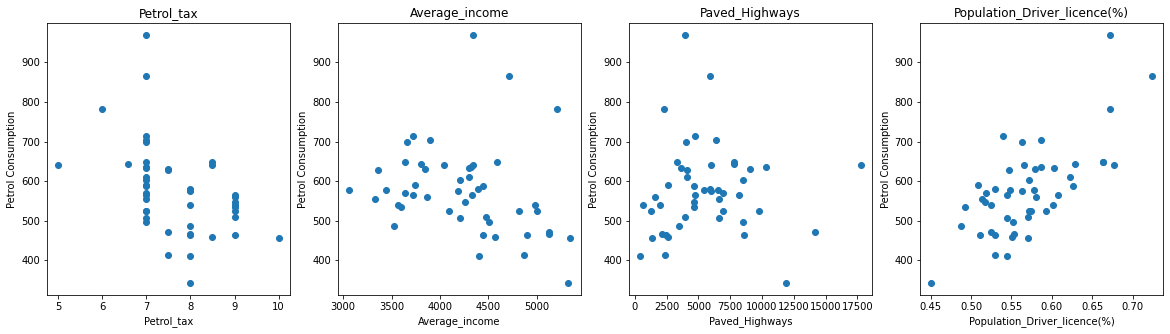

In [9]:
plt.figure(figsize=(20, 5))

features = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
target = dataset['Petrol_Consumption']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Petrol Consumption')

The relationships don't seem to be linear so it makes sense to make Decision Tree regression.
It seems to be a stronger relationship between Petrol Consumption and Average_income and Petrol Consumption and Population_Driver_licence(%).

# **Model 1**

Independent variables: 


*   Petrol_tax
*   Average_income
*   Paved_Highways
*   Population_Driver_licence(%)

In [10]:
X = pd.DataFrame(np.c_[dataset['Petrol_tax'], dataset['Average_income'],
                       dataset['Paved_Highways'], dataset['Population_Driver_licence(%)']], 
                 columns = ['Petrol_tax', 'Average_income',
                            'Paved_Highways', 'Population_Driver_licence(%)'])
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571.0,1976.0,0.525
1,9.0,4092.0,1250.0,0.572
2,9.0,3865.0,1586.0,0.580
3,7.5,4870.0,2351.0,0.529
4,8.0,4399.0,431.0,0.544


Dependent variable: 

*  Petrol_Consumption







In [11]:
y = dataset['Petrol_Consumption']
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

We'll split the dataset into train and test sets.

In [12]:
from sklearn.model_selection import train_test_split

# Consider 20% as test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Fitting Decision Tree Regression 🌳

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
regressor = DecisionTreeRegressor()

In [14]:
# Train the model
regressor.fit(X_train, y_train);

In [15]:
# Get the predictors
y_test_pred = regressor.predict(X_test)
y_test_pred

array([541., 414., 554., 554., 554., 574., 628., 525., 414., 464.])

In [16]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_test_pred})
df

,Real Values,Predicted Values
29,534,541.0
4,410,414.0
26,577,554.0
30,571,554.0
32,577,554.0
37,704,574.0
34,487,628.0
40,587,525.0
7,467,414.0
10,580,464.0


Evaluation of the model📝

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [18]:
# model evaluation for testing set

print("The model performance for testing set")
print("--------------------------------------")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))


The model performance for testing set
--------------------------------------
Mean Absolute Error: 57.6
Mean Squared Error: 5830.2
Root Mean Squared Error: 76.35574634564186


In [24]:
# Mean of all the values in Petrol_Consumption column
dataset.Petrol_Consumption.mean()

576.7708333333334

Mean absolute error for our algorithm is 57.6, which is less than 10 percent of the mean of all the values in the *Petrol_Consumption* column.

# **Model 2**

Fitting Decision Tree Regression 🌳

In [19]:
# Initialize the model
regressor = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
# Train the model
regressor.fit(X_train, y_train);

In [21]:
# Get the predictors
y_test_pred = regressor.predict(X_test)
y_test_pred

array([547., 414., 574., 554., 631., 644., 648., 649., 414., 464.])

In [22]:
df_2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_test_pred})
df_2

,Real Values,Predicted Values
29,534,547.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,631.0
37,704,644.0
34,487,648.0
40,587,649.0
7,467,414.0
10,580,464.0


Evaluation of model 2 📝

In [23]:
# model evaluation for testing set

print("The model performance for testing set")
print("--------------------------------------")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The model performance for testing set
--------------------------------------
Mean Absolute Error: 54.3
Mean Squared Error: 5302.9
Root Mean Squared Error: 72.82101345078905


In [25]:
# Mean of all the values in Petrol_Consumption column
dataset.Petrol_Consumption.mean()

576.7708333333334

Mean absolute error for our algorithm is 54.3, which is lower than the one we got for model 1.

# **Model 3**

Fitting Decision Tree Regression 🌳

In [52]:
# Initialize the model
regressor = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [53]:
# Train the model
regressor.fit(X_train, y_train);

In [54]:
# Get the predictors
y_test_pred = regressor.predict(X_test)
y_test_pred

array([541., 414., 554., 554., 554., 574., 628., 649., 414., 498.])

In [55]:
df_3 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_test_pred})
df_3

,Real Values,Predicted Values
29,534,541.0
4,410,414.0
26,577,554.0
30,571,554.0
32,577,554.0
37,704,574.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,498.0


Evaluation of model 3 📝

In [56]:
# model evaluation for testing set

print("The model performance for testing set")
print("--------------------------------------")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The model performance for testing set
--------------------------------------
Mean Absolute Error: 54.2
Mean Squared Error: 5157.0
Root Mean Squared Error: 71.81225522151495


In [57]:
# Mean of all the values in Petrol_Consumption column
dataset.Petrol_Consumption.mean()

576.7708333333334

Mean absolute error for our algorithm is 54.2, which is slightly lower than the one we got for model 2 and mean squared error is lower too so it seems to be a better model.